# End TO End Deep Learning Project Using Simple RNN

In [1]:
import numpy as numpy
import pandas as pd
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding, SimpleRNN,Dense


In [2]:
## Laoding the IMDB Database
max_features = 10000 ## Voccabulary Size
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=max_features)

In [3]:
print(f"X Training Data Shape: {X_train.shape}, X Training Data labels shape: {y_train.shape}")
print(f"X Testing Data Shape: {X_test.shape}, X Testing  Data labels shape: {y_test.shape}")

X Training Data Shape: (25000,), X Training Data labels shape: (25000,)
X Testing Data Shape: (25000,), X Testing  Data labels shape: (25000,)


In [4]:
# print first sentence 
X_train[0], y_train[0]

([1,
  14,
  22,
  16,
  43,
  530,
  973,
  1622,
  1385,
  65,
  458,
  4468,
  66,
  3941,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  2,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  2,
  336,
  385,
  39,
  4,
  172,
  4536,
  1111,
  17,
  546,
  38,
  13,
  447,
  4,
  192,
  50,
  16,
  6,
  147,
  2025,
  19,
  14,
  22,
  4,
  1920,
  4613,
  469,
  4,
  22,
  71,
  87,
  12,
  16,
  43,
  530,
  38,
  76,
  15,
  13,
  1247,
  4,
  22,
  17,
  515,
  17,
  12,
  16,
  626,
  18,
  2,
  5,
  62,
  386,
  12,
  8,
  316,
  8,
  106,
  5,
  4,
  2223,
  5244,
  16,
  480,
  66,
  3785,
  33,
  4,
  130,
  12,
  16,
  38,
  619,
  5,
  25,
  124,
  51,
  36,
  135,
  48,
  25,
  1415,
  33,
  6,
  22,
  12,
  215,
  28,
  77,
  52,
  5,
  14,
  407,
  16,
  82,
  2,
  8,
  4,
  107,
  117,
  5952,
  15,
  256,
  4,
  2,
  7,
  3766,
  5,
  723,
  36,
  71,
  43,
  530,
  476,
  26,
  400,
  317,
  46,
  7,
  4,
  2,
  1029,
  

- Note: as you can see above that is 1st sentence encoded with onehot encoding with 10000 vocabulary size and its output is 1 since there output is binary

In [5]:
## inspect a sample review  and its label

sample_review = X_train[0]
sample_label  = y_train[0]

print(f"This is my sample review  (as integers): {sample_review }")
print(f"This is my sample Label  (as integers): {sample_label }")

This is my sample review  (as integers): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
This is my sample L

In [6]:
## Lets Mapping of words index back to words (For Our Understanding)
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [7]:
reverse_word_index = {value:key for key,value in word_index.items()}
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [8]:
## Check what is the first sentence (Just for Understanding)
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in sample_review])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
## For adding zeros in first for all sentences will be in a exact length as 500 words
from tensorflow.keras.preprocessing import sequence

max_len = 500

X_train = sequence.pad_sequences(X_train,maxlen=max_len)
X_test = sequence.pad_sequences(X_test,maxlen=max_len)

In [10]:
## See 0 addded in sentence before previous embeded
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [11]:
## Train Simple RNN
model  = Sequential()
# model.add(embedding(max_features = used default, dim = 128, input_length = max_len))
model.add(Embedding(max_features,128,input_shape =(max_len,)))  ## Embedding layers
model.add(SimpleRNN(128,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\prash\OneDrive\Desktop\Certificate_Practice\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,313,025 (5.01 MB)

 Trainable params: 1,313,025 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
### Create an instance of EarlyStopping Callback
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor = 'val_loss',patience=5,restore_best_weights=True)
earlystopping
## We can use below code to save the best model while training  
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True)


In [15]:
## Train the model with earlystopping
history=model.fit(
    X_train,y_train,epochs=10,batch_size=32,
    validation_split = 0.2,
    callbacks =[earlystopping, checkpoint] # if using save best model code then add like [earlystopping,checkpoint]
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.5322 - loss: 0.6904

625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 183ms/step - accuracy: 0.5680 - loss: 0.6709 - val_accuracy: 0.6226 - val_loss: 0.6443
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 225ms/step - accuracy: 0.6730 - loss: 0.6022 - val_accuracy: 0.6252 - val_loss: 0.6473
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.7172 - loss: 0.5483

625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 225ms/step - accuracy: 0.7115 - loss: 0.5515 - val_accuracy: 0.6452 - val_loss: 0.6349
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.7579 - loss: 0.4943

625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 236ms/step - accuracy: 0.7586 - loss: 0.4960 - val_accuracy: 0.6832 - val_loss: 0.6283
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.8123 - loss: 0.4224

625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 236ms/step - accuracy: 0.8101 - loss: 0.4246 - val_accuracy: 0.7248 - val_loss: 0.5680
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 237ms/step - accuracy: 0.8384 - loss: 0.3771 - val_accuracy: 0.7366 - val_loss: 0.6143
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 233ms/step - accuracy: 0.8690 - loss: 0.3252 - val_accuracy: 0.7484 - val_loss: 0.6096
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 232ms/step - accuracy: 0.8899 - loss: 0.2822 - val_accuracy: 0.7156 - val_loss: 0.6103
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 184s 203ms/step - accuracy: 0.9051 - loss: 0.2493 - val_accuracy: 0.7458 - val_loss: 0.5830
Epoch 10/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 232ms/step - accuracy: 0.9108 - loss: 0.2367 - val_accuracy: 0.7396 - val_loss: 0.6488


In [16]:
model.get_weights()[0][0]

array([ 0.05035057,  0.01831056,  0.021644  , -0.00079674, -0.01026262,
        0.01048453,  0.03394175, -0.03903415,  0.03043014,  0.04181175,
       -0.01355793,  0.00782735,  0.06865276, -0.00354445,  0.01372694,
        0.04653225, -0.02687526,  0.05259557, -0.09062588, -0.03672455,
       -0.00280467,  0.09033132, -0.00077947, -0.04705442,  0.01707831,
        0.01368408,  0.00907298,  0.00742278,  0.00288848, -0.0252923 ,
       -0.06458853,  0.03223682,  0.07595766,  0.04285484, -0.04906589,
       -0.02454861,  0.05807986, -0.04041544,  0.0699323 , -0.00527303,
        0.00842205,  0.03779571,  0.00758346, -0.03169199, -0.06151879,
        0.03859112,  0.0296227 , -0.00477077, -0.02642909,  0.04603047,
       -0.03686982, -0.00186043, -0.01349224, -0.02394084, -0.02215653,
        0.01235978,  0.05143551,  0.03867108,  0.01589186,  0.01297335,
        0.01076189,  0.05976303, -0.01775093, -0.00171289,  0.00044051,
        0.01079745, -0.05255821,  0.05304665,  0.01359308,  0.03

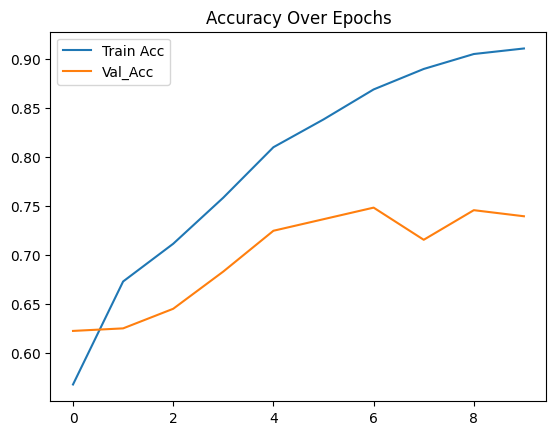

In [17]:
## lets plot Accuracy and loss while training

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='Train Acc')
plt.plot(history.history['val_accuracy'],label='Val_Acc')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

### Observation : 
#### After using tanh activation:
1. Loss is stable, no signs of exploding gradients or instability as seen with relu

2. Model learns progressively better over epochs

#### From Epoch 6 onward:
1. Training accuracy continues rising (up to 91% by Epoch 10)

2. Validation accuracy peaks at Epoch 7 (~74.8%), then slightly drops

3. Validation loss starts increasing → early sign of overfitting


In [ ]:
## Saving the trianing history in txt file
with open("training_log_test.txt", "w") as f:
    for epoch in range(len(history.history['loss'])):
        f.write(f"Epoch {epoch+1}:\n")
        f.write(f" - loss: {history.history['loss'][epoch]:.4f}\n")
        f.write(f" - accuracy: {history.history['accuracy'][epoch]:.4f}\n")
        if 'val_loss' in history.history:
            f.write(f" - val_loss: {history.history['val_loss'][epoch]:.4f}\n")
        if 'val_accuracy' in history.history:
            f.write(f" - val_accuracy: {history.history['val_accuracy'][epoch]:.4f}\n")
        f.write("\n")